In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.autograd import Variable
from sklearn import datasets
import torch

In [55]:
read_data = datasets.load_iris()
data = read_data.data
target = read_data.target
data = pandas.DataFrame(data)
target = pandas.DataFrame(target)
data = pandas.concat([data, target], axis=1)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [90]:
# Split the data into train and test
train = data.sample(frac=0.8, random_state=200)
test = data.drop(train.index)

# Convert the data into tensors
train_x = torch.from_numpy(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values).float()
train_y = torch.from_numpy(train[['target']].values)
test_x = torch.from_numpy(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values).float()
test_y = torch.from_numpy(test[['target']].values)



In [95]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 10),
            nn.ReLU(),
            nn.Linear(10, 3),
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [96]:
# One hot encoding of the target
train_y_one_hot = F.one_hot(train_y.squeeze().long())
test_y_one_hot = F.one_hot(test_y.squeeze().long())

train_y_one_hot

tensor([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 

In [93]:
train_y_one_hot.shape

torch.Size([120, 3])

In [94]:
print(train_x.shape)
print(train_y_one_hot.shape)
print(test_x.shape)
print(test_y_one_hot.shape)
print(train_y.shape)
print(test_y.shape)

torch.Size([120, 4])
torch.Size([120, 3])
torch.Size([30, 4])
torch.Size([30, 3])
torch.Size([120, 1])
torch.Size([30, 1])


Epoch: 0, Loss: 1.1477243900299072
Epoch: 100, Loss: 0.7189658880233765
Epoch: 200, Loss: 0.5009283423423767
Epoch: 300, Loss: 0.40954700112342834
Epoch: 400, Loss: 0.3433724045753479
Epoch: 500, Loss: 0.276459664106369
Epoch: 600, Loss: 0.22301673889160156
Epoch: 700, Loss: 0.18154746294021606
Epoch: 800, Loss: 0.15184584259986877
Epoch: 900, Loss: 0.13108417391777039
Epoch: 1000, Loss: 0.11641457676887512
Epoch: 1100, Loss: 0.10576408356428146
Epoch: 1200, Loss: 0.09778189659118652
Epoch: 1300, Loss: 0.09162607043981552
Epoch: 1400, Loss: 0.08674764633178711
Epoch: 1500, Loss: 0.08279131352901459
Epoch: 1600, Loss: 0.07951363921165466
Epoch: 1700, Loss: 0.0767444297671318
Epoch: 1800, Loss: 0.07436876744031906
Epoch: 1900, Loss: 0.0723031610250473
Epoch: 2000, Loss: 0.07048555463552475
Epoch: 2100, Loss: 0.06887023150920868
Epoch: 2200, Loss: 0.06742260605096817
Epoch: 2300, Loss: 0.06611540168523788
Epoch: 2400, Loss: 0.06492725014686584
Epoch: 2500, Loss: 0.06384065002202988
Epoch:

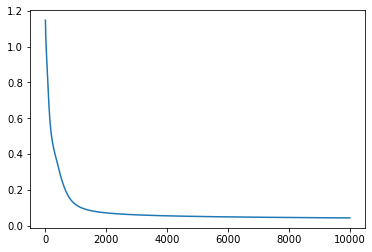

In [101]:
newt = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(newt.parameters(), lr=0.01)
losses = []
for epoch in range(10000):
    optimizer.zero_grad()
    out = newt(train_x)
    train_y_one_hot = train_y_one_hot.float()
    loss = criterion(out, train_y_one_hot)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

plt.plot(losses)
plt.show()

torch.Size([120, 4])
torch.Size([120, 3])
torch.Size([30, 4])
torch.Size([30, 3])


In [102]:
# Predict the test data
out = newt(test_x)
_, predicted = torch.max(out.data, 1)
print('Predicted: ', predicted)
print('Actual: ', test_y.squeeze())

# Calculate the accuracy

correct = 0
total = 0
with torch.no_grad():
        out = newt(test_x)
        _, predicted = torch.max(out.data, 0)
        total += test_y.size(0)
        correct += (predicted == test_y).sum().item()

print('Accuracy of the network on the 30 test images: %d %%' % (
    100 * correct / total))


Predicted:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 2])
Actual:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=torch.int32)
Accuracy of the network on the 30 test images: 80 %
